<a href="https://colab.research.google.com/github/plavez/Jupyter/blob/Scikit/Scikit_Prediction_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
!pip install scikit-learn


In [147]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [128]:
df=pd.read_csv('vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [129]:
df.dtypes

,0
Age,int64
Gender,object
Income,float64
Favorite Transport,object


## Cleaning

In [130]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,6
Favorite Transport,0


In [131]:
df['Income'].fillna(0.0,inplace=True)
df.head

<ipython-input-131-ec911f086075>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(0.0,inplace=True)


<bound method NDFrame.head of     Age  Gender   Income Favorite Transport
0     5  female      0.0            bicycle
1     8    male      0.0            scooter
2    10  female      0.0            bicycle
3    14    male      0.0              metro
4    16    male      0.0              metro
5    18  female      0.0              metro
6    20    male    200.0            scooter
7    22  female    500.0            scooter
8    23    male    300.0            scooter
9    25  female    800.0              metro
10   27  female   3000.0                car
11   30  female   5000.0                car
12   33    male   7000.0                car
13   40    male   9000.0                car
14   45    male   3000.0               taxi
15   47  female   6000.0                car
16   49    male   8000.0                car
17   53  female   1300.0               taxi
18   56  female   1400.0               taxi
19   57    male   4000.0                car
20   59  female   5500.0                car
21   64    male   6500.0                car
22   68    male  20000.0         helicopter
23   70  female   2500.0               taxi
24   71    male  25000.0         helicopter
25   75    male  30000.0         helicopter>

In [132]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Favorite Transport,0


## Encoding

In [133]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [134]:
#Option 1 - manual
# df.replace({
#     'Gender':{
#         'male': 0,
#         'female': 1
#     }
# }, inplace=True)
# df.head(5)

In [135]:
#Option 2 -automat
label_encoder = LabelEncoder()
df ['Gender']=label_encoder.fit_transform(df['Gender'])
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


## Model

In [136]:
X=df.drop(columns='Favorite Transport')
X.head(3)

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0


In [137]:
y = df['Favorite Transport']
y.head(3)

,Favorite Transport
0,bicycle
1,scooter
2,bicycle


In [138]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [139]:
model.fit(X,y)

DecisionTreeClassifier()

## Prediction

In [140]:
test_df = pd.DataFrame({
    'Age':[12,30,75],
    'Gender':[0,0,1],
    'Income':[0.0,250.0,4000.0]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,250.0
2,75,1,4000.0


In [141]:
model.predict(test_df)

array(['bicycle', 'metro', 'helicopter'], dtype=object)

## Exporting to the DOT file

In [142]:
tree.export_graphviz(model,out_file='decision_tree_model.dot',feature_names=['Age','Gender','Income'],filled=True,class_names=sorted(y.unique()))

## Evaluation

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [144]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [145]:
prediction = model.predict(X_test)
prediction

array(['helicopter', 'taxi', 'car'], dtype=object)

In [146]:
model_accuracy_score = accuracy_score(y_test,prediction)
model_accuracy_score

1.0

## Charts

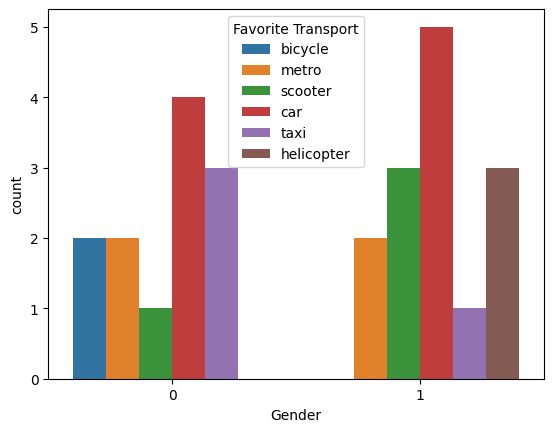

In [148]:
sns.countplot(x=df['Gender'],hue=df['Favorite Transport'])
plt.show()


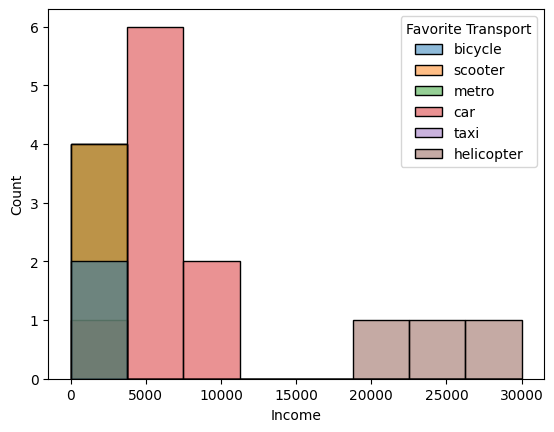

In [149]:
sns.histplot(x=df['Income'],hue=df['Favorite Transport'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')